Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor as LOF
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '60d31a0ae7c20e0e57f9c6b8'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 71905
before = 1
after = 4

In [12]:
anom.loc[ind - 730 * before + 10 * 3 + 6:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
71211,2021-09-30 00:52:09,60d31a0ae7c20e0e57f9c6b8,"[229.741081081081,230.390789473684,230.7456410...","[0.2,0.3,0.4]","[10.4334146341463,5.8309756097561,67.864634146...","[24819.8860166667,32771.7618833333,28442.63292...",[],[],[],84.129024,...,[],[],86.27,86034.2822,\N,\N,\N,"[-75.6,-84,-37.2]","[0,-119.5,120.2]",49.99
71212,2021-09-30 00:54:09,60d31a0ae7c20e0e57f9c6b8,"[229.986153846154,230.195238095238,230.8948571...","[0.2,0.3,0.4]","[10.9635,5.31292682926829,67.9885365853658]","[24819.8863636364,32771.7620833333,28442.63519...",[],[],[],84.264963,...,[],[],85.5,86034.285,\N,\N,\N,"[-75.7,-85.4,-37.2]","[0,-119.6,120.1]",49.98
71213,2021-09-30 00:56:09,60d31a0ae7c20e0e57f9c6b8,"[229.827317073171,229.97075,230.901794871795]","[0.2,0.3,0.4]","[10.952380952381,5.27951219512195,67.991428571...","[24819.8867416667,32771.76226,28442.6374536585]",[],[],[],84.223322,...,[],[],85.03,86034.2878,\N,\N,\N,"[-75.7,-85.2,-37.1]","[0,-119.6,120.1]",49.98
71214,2021-09-30 00:58:09,60d31a0ae7c20e0e57f9c6b8,"[229.350555555556,229.739230769231,230.7235897...","[0.2,0.3,0.4]","[10.773,5.5025641025641,67.88275]","[24819.8871,32771.7624166667,28442.639705]",[],[],[],84.158314,...,[],[],85.89,86034.2906,\N,\N,\N,"[-75.7,-84.5,-37.2]","[0,-119.6,120.3]",49.99
71215,2021-09-30 01:00:09,60d31a0ae7c20e0e57f9c6b8,"[229.423157894737,229.985897435897,230.9713157...","[0.2,0.3,0.4]","[9.36707317073171,6.8919512195122,67.986097560...","[24819.8874363636,32771.76265,28442.6419536585]",[],[],[],84.245122,...,[],[],87.73,86034.2935,\N,\N,\N,"[-75.7,-82.9,-37.4]","[0,-119.6,120.2]",49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74781,2021-10-05 00:08:10,60d31a0ae7c20e0e57f9c6b8,"[237.68972972973,237.953684210526,238.64894736...","[0.2,0.3,0.4]","[11.4775609756098,5.25925,72.6265853658537]","[25013.2555,32986.03396,28651.16621]",[],[],[],89.363396,...,[],[],90.67,86650.4571,\N,\N,\N,"[-75.4,-85.4,-36.1]","[0,-119.4,120.2]",49.99
74782,2021-10-05 00:10:10,60d31a0ae7c20e0e57f9c6b8,"[237.755263157895,238.047,238.674871794872]","[0.2,0.3,0.4]","[10.879512195122,5.8665,72.6560975609756]","[25013.2558727273,32986.0341714286,28651.16865...",[],[],[],89.40211,...,[],[],92.65,86650.4601,\N,\N,\N,"[-75.5,-84.1,-36.2]","[0,-119.4,120.2]",49.99
74783,2021-10-05 00:12:10,60d31a0ae7c20e0e57f9c6b8,"[237.878571428571,238.228048780488,238.7051282...","[0.2,0.3,0.4]","[10.8511904761905,5.90857142857143,72.63571428...","[25013.2562416667,32986.03435,28651.171025641]",[],[],[],89.395476,...,[],[],91.79,86650.463,\N,\N,\N,"[-75.5,-84.4,-36.2]","[0,-119.4,120.2]",49.97
74784,2021-10-05 00:14:10,60d31a0ae7c20e0e57f9c6b8,"[238.034102564103,238.018974358974,239.083]","[0.2,0.3,0.4]","[11.24,5.52853658536586,72.8945]","[25013.2566166667,32986.03455,28651.1734878049]",[],[],[],89.663037,...,[],[],91.72,86650.4661,\N,\N,\N,"[-75.2,-84.6,-36]","[0,-119.4,120.3]",49.98


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

In [50]:
n_neigh = 60

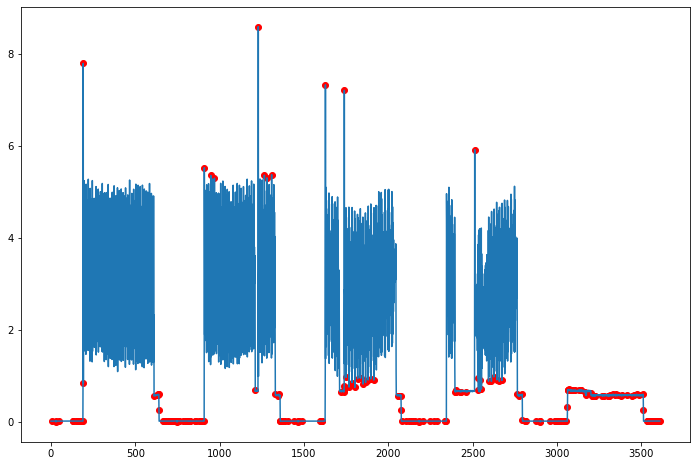

In [51]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

729
0 729
191 641 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2077 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3063 3513 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


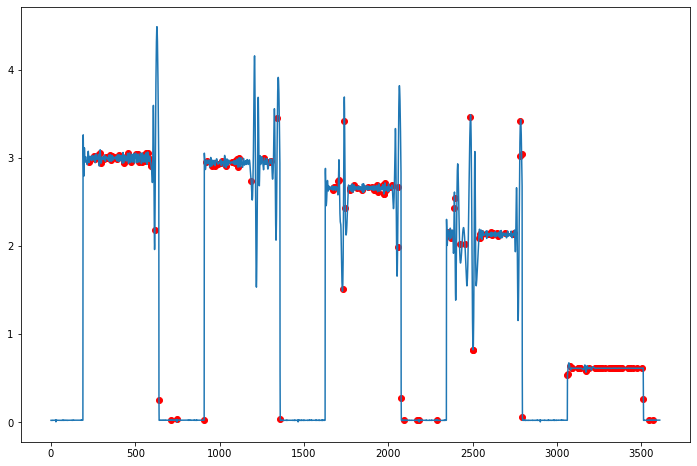

In [34]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

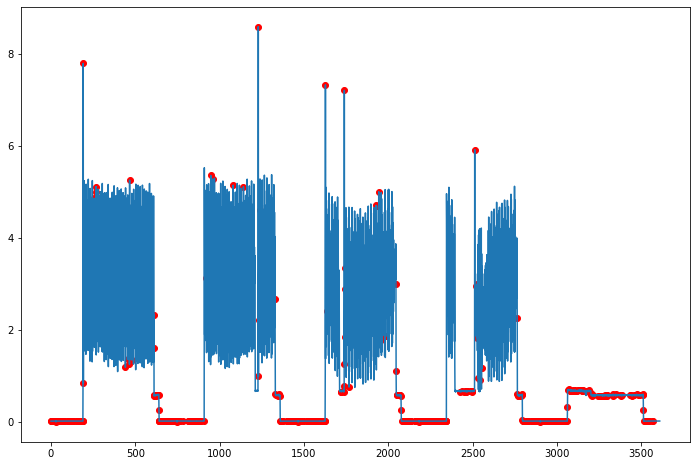

In [35]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

729
0 729
191 641 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2077 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3063 3513 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


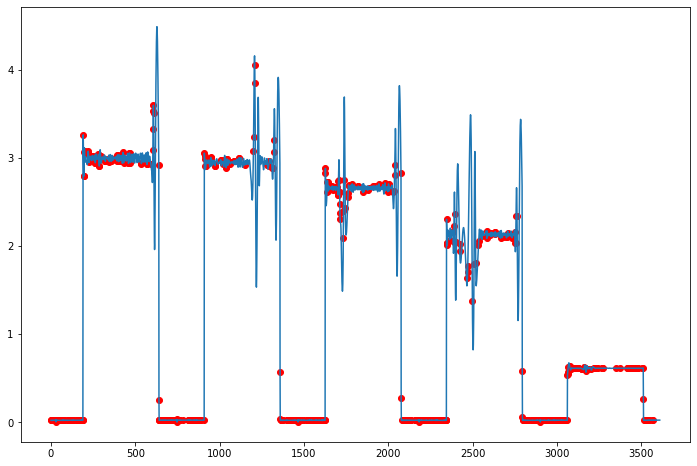

In [36]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4


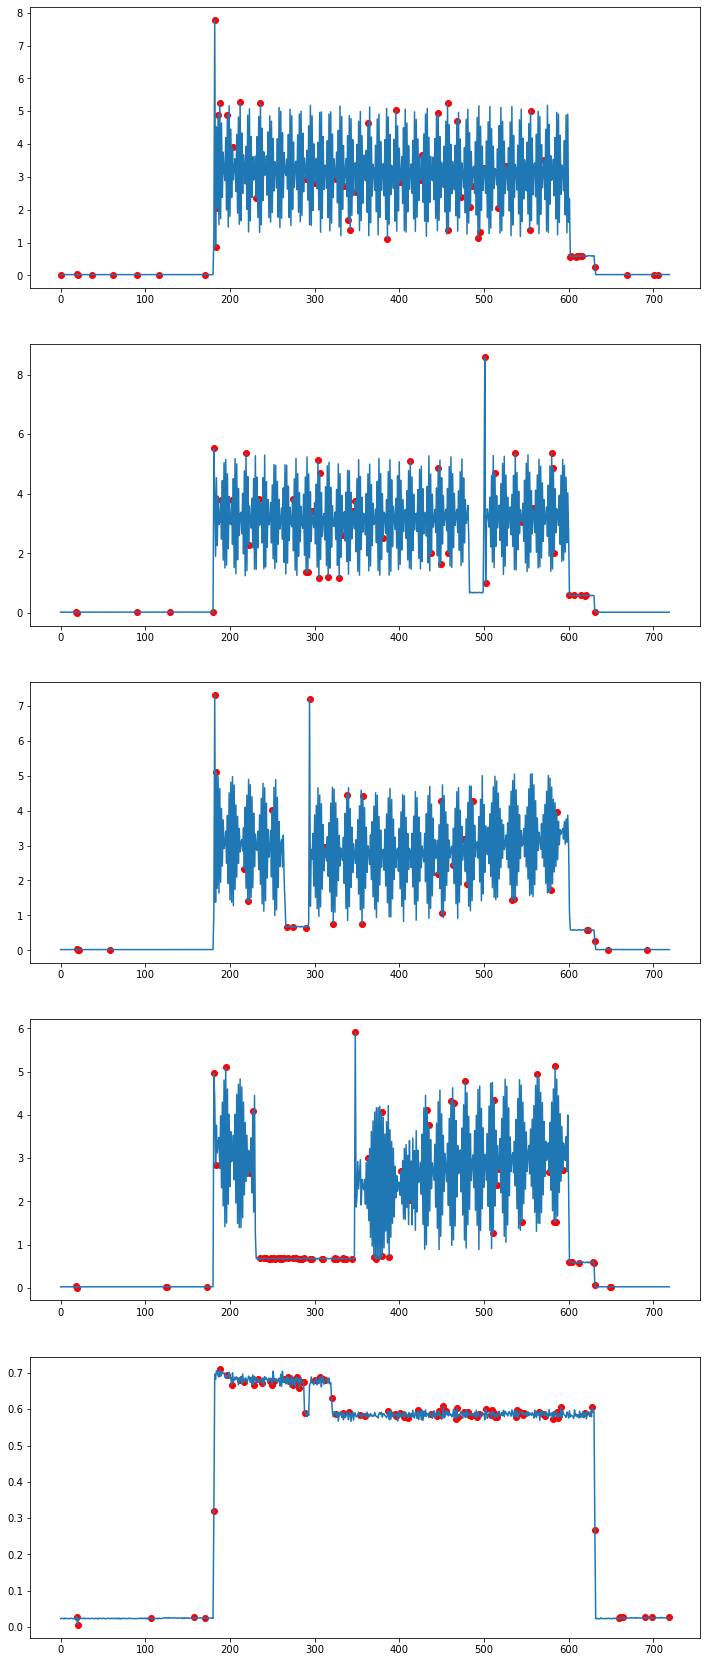

In [37]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  


fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

729
0 729
191 641 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2077 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3063 3513 4
[  12  729 1448 2165 2884 3601]
12 729 0
729 1448 1
1448 2165 2
2165 2884 3
2884 3601 4
(5, 720)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


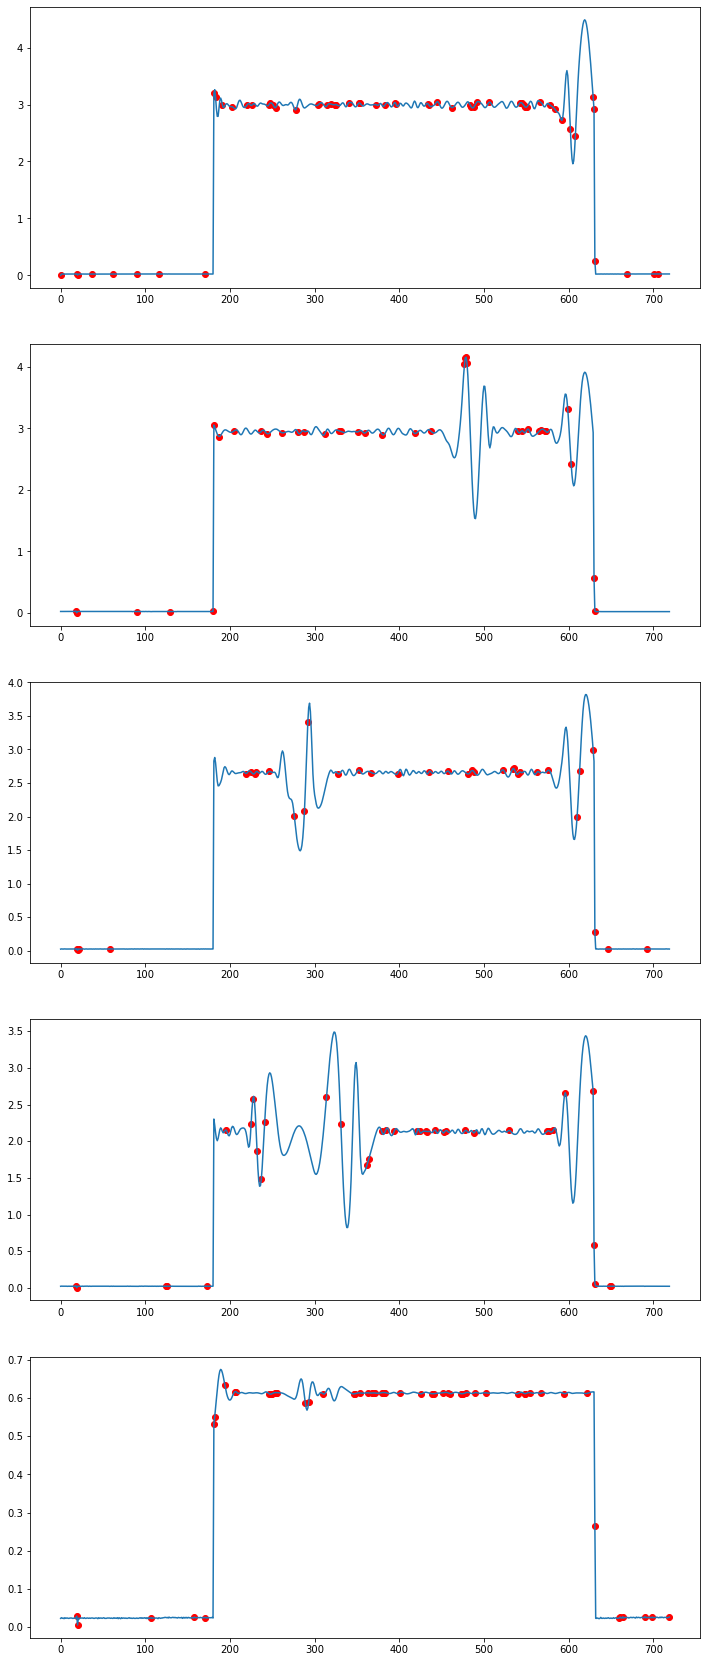

In [41]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(5, 720, 5)


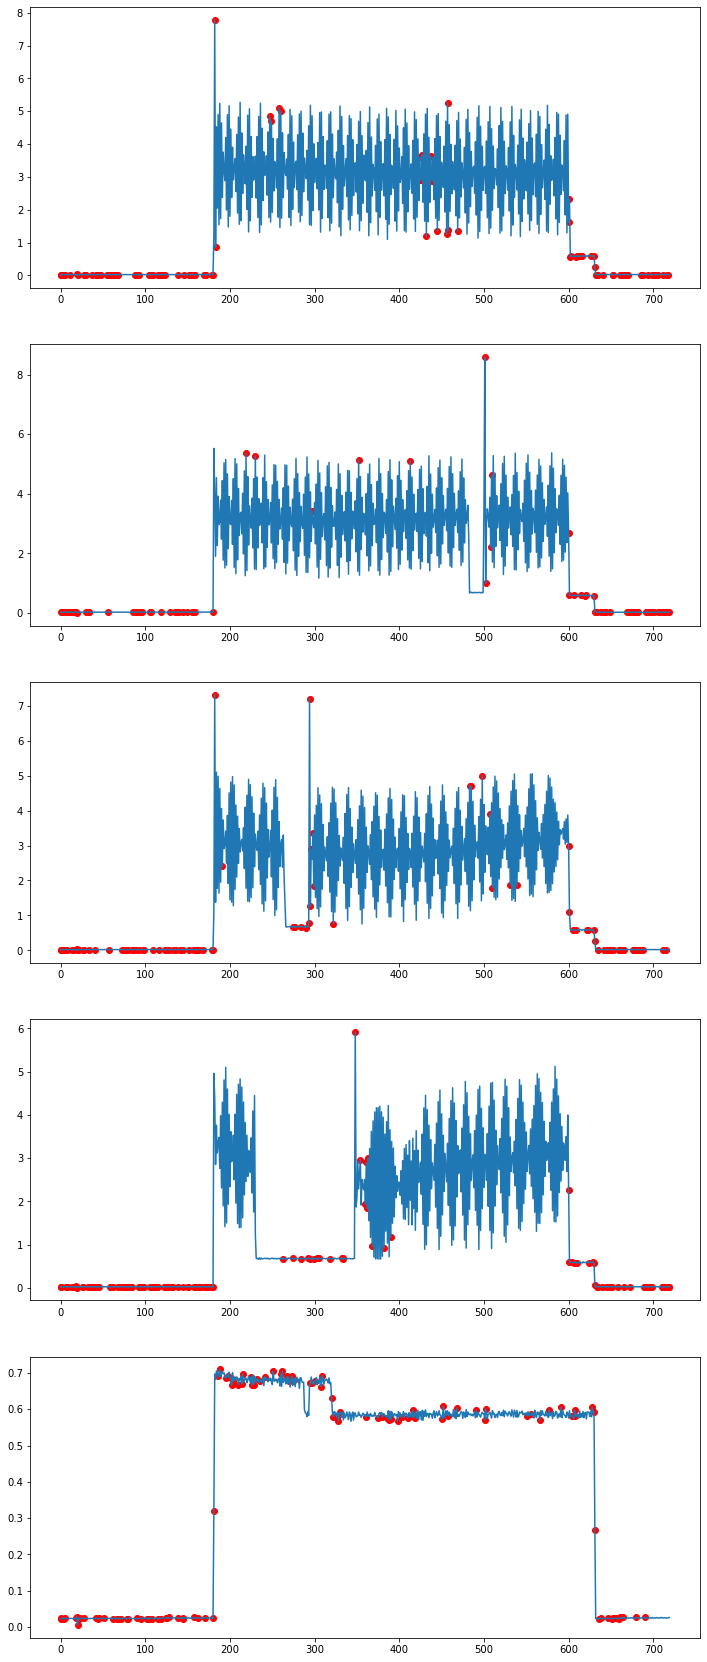

In [42]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

729
0 729
191 641 0
1448
729 1448
910 1359 1
2165
1448 2165
1627 2077 2
2884
2165 2884
2346 2795 3
3601
2884 3601
3063 3513 4
(5, 720, 5)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


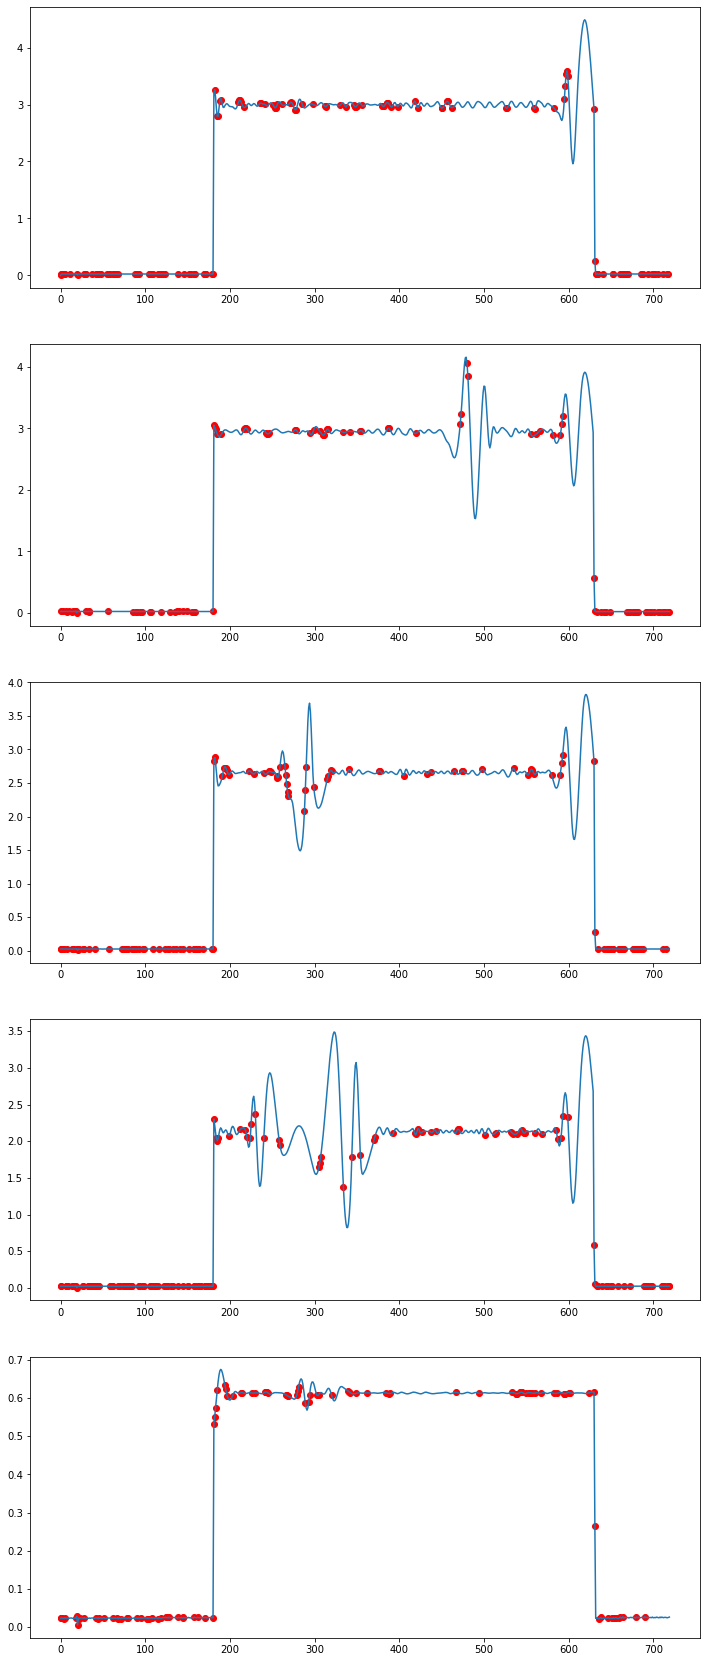

In [43]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))

model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)
    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

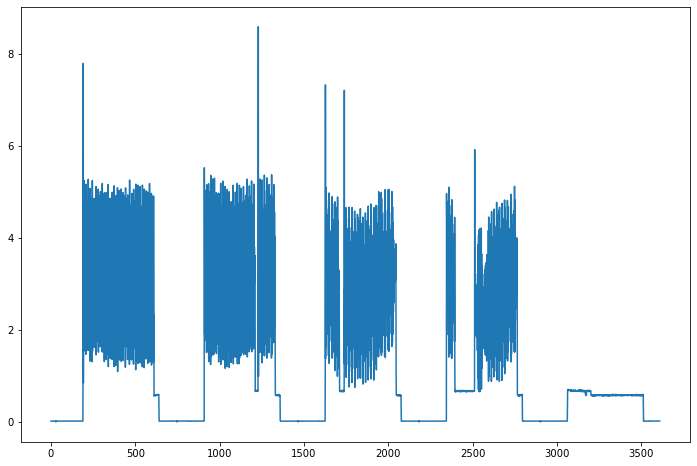

In [24]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=4)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

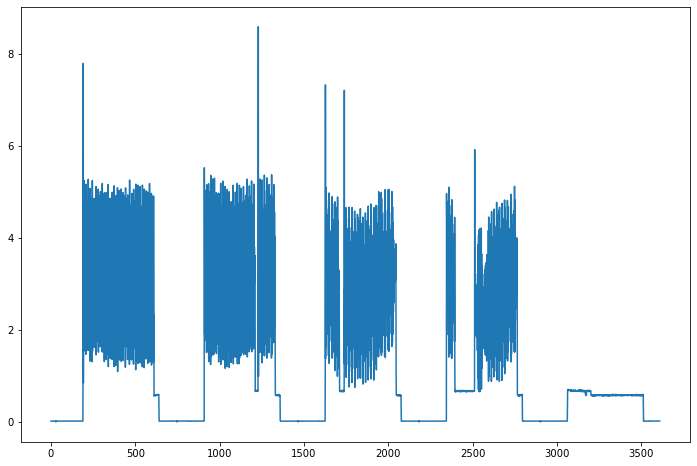

In [25]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=4)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

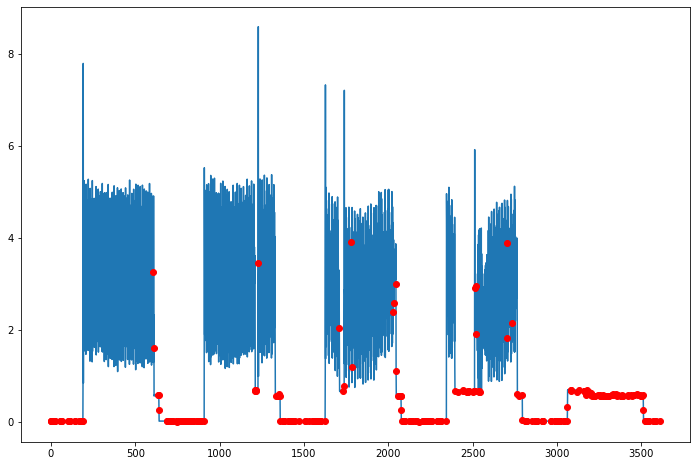

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=4)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


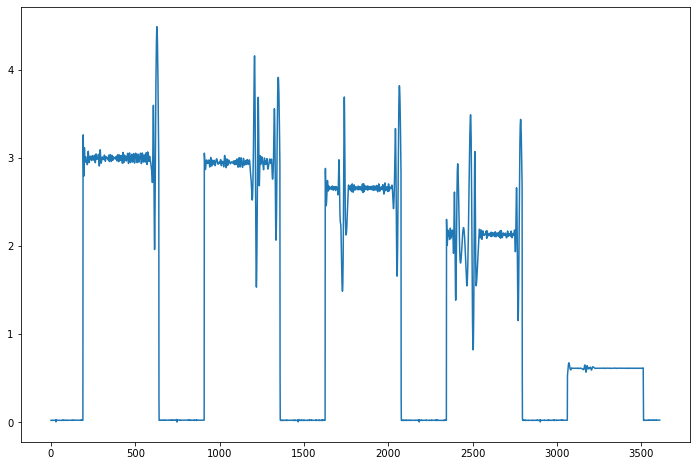

In [16]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=20)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


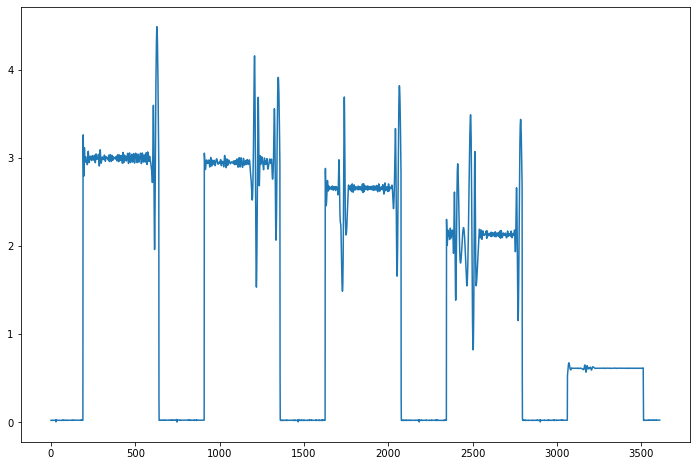

In [20]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=3)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Оригинальные данные, бинарная мульти размерность, c EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


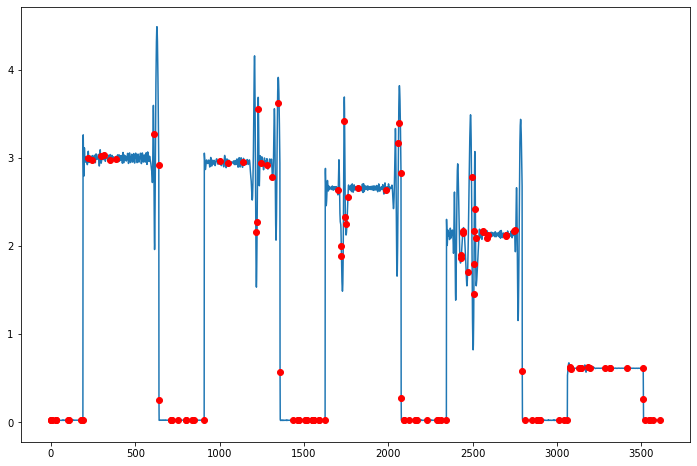

In [13]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=5)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


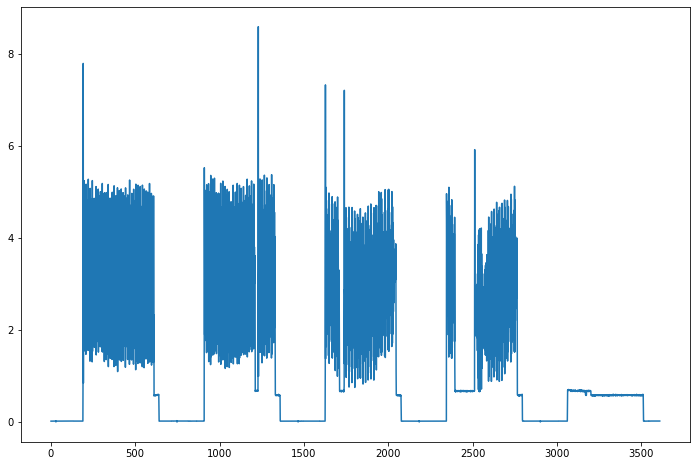

In [8]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


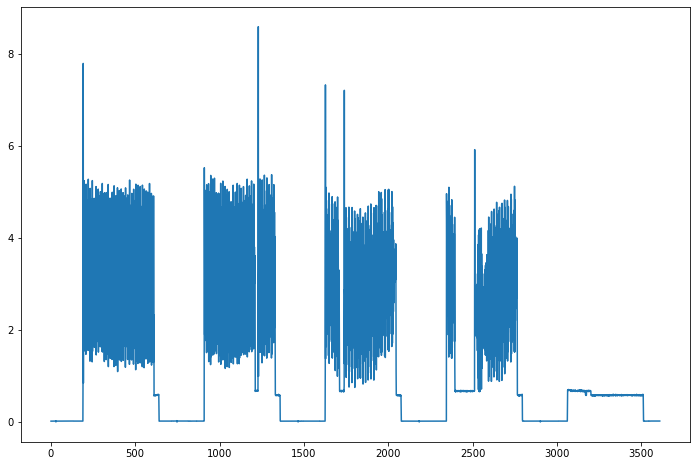

In [9]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


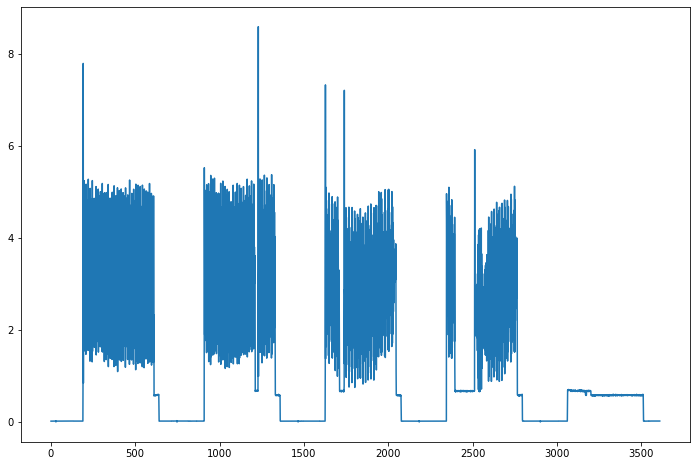

In [7]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


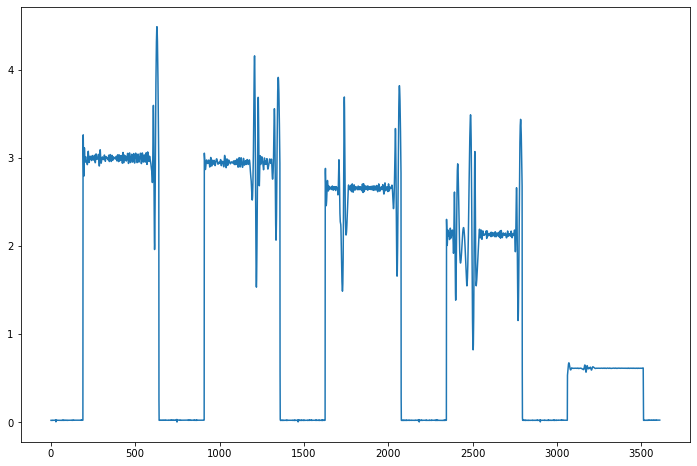

In [5]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


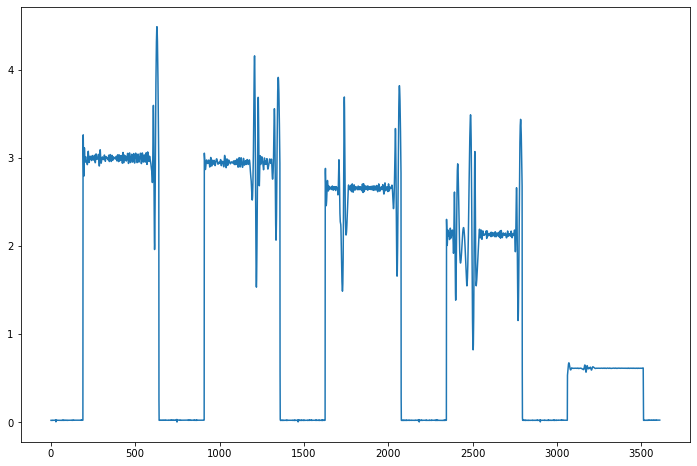

In [6]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


[  12  729 1448 2165 2884 3601]
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
SMALL
3611
720
[1 1 1 1 1]


/Users/veronikalomonosova/Documents/GitHub/diploma/LOF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


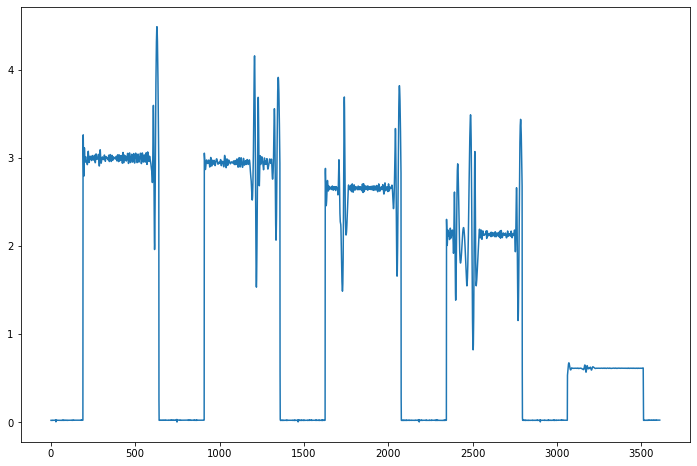

In [4]:

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')